Epoch [100/1000], Loss: 0.2090
Epoch [200/1000], Loss: 0.1568
Epoch [300/1000], Loss: 0.1276
Epoch [400/1000], Loss: 0.1111
Epoch [500/1000], Loss: 0.1019
Epoch [600/1000], Loss: 0.0968
Epoch [700/1000], Loss: 0.0939
Epoch [800/1000], Loss: 0.0923
Epoch [900/1000], Loss: 0.0913
Epoch [1000/1000], Loss: 0.0908
Estimated m: 0.5680, Estimated b: -0.1296


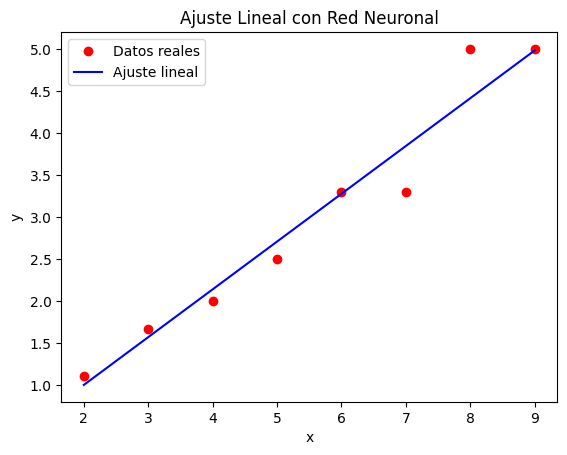

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada
data = [(2, 1.11), (3, 1.67), (4, 2), (5, 2.5), (6, 3.3), (7, 3.3), (8, 5), (9, 5)]
x_data = np.array([x for x, y in data], dtype=np.float32)
y_data = np.array([y for x, y in data], dtype=np.float32)

# Convertir los datos a tensores de PyTorch
x_tensor = torch.from_numpy(x_data).reshape(-1, 1)
y_tensor = torch.from_numpy(y_data).reshape(-1, 1)

# Definir el modelo
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # Una entrada, una salida

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Entrenamiento del modelo
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass y optimización
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Obtener los parámetros del modelo (m y b)
with torch.no_grad():
    m = model.linear.weight.item()
    b = model.linear.bias.item()
    print(f'Estimated m: {m:.4f}, Estimated b: {b:.4f}')

# Graficar los resultados
plt.plot(x_data, y_data, 'ro', label='Datos reales')
plt.plot(x_data, m * x_data + b, 'b', label='Ajuste lineal')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Lineal con Red Neuronal')
plt.show()


Epoch [100/1000], Loss: 0.7565
Epoch [200/1000], Loss: 0.6286
Epoch [300/1000], Loss: 0.5549
Epoch [400/1000], Loss: 0.4839
Epoch [500/1000], Loss: 0.4212
Epoch [600/1000], Loss: 0.3692
Epoch [700/1000], Loss: 0.3285
Epoch [800/1000], Loss: 0.2981
Epoch [900/1000], Loss: 0.2764
Epoch [1000/1000], Loss: 0.2617
Estimated m: 0.4909, Estimated b: 0.3345


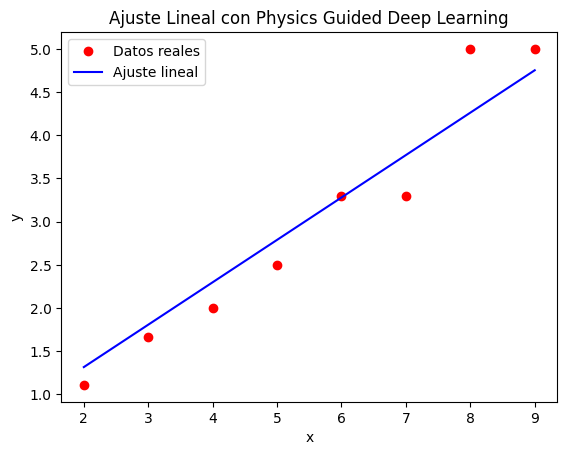

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada
data = [(2, 1.11), (3, 1.67), (4, 2), (5, 2.5), (6, 3.3), (7, 3.3), (8, 5), (9, 5)]
x_data = np.array([x for x, y in data], dtype=np.float32)
y_data = np.array([y for x, y in data], dtype=np.float32)

# Convertir los datos a tensores de PyTorch
x_tensor = torch.from_numpy(x_data).reshape(-1, 1)
y_tensor = torch.from_numpy(y_data).reshape(-1, 1)

# Definir el modelo
class LinearRegressionPhysicsGuided(nn.Module):
    def __init__(self):
        super(LinearRegressionPhysicsGuided, self).__init__()
        self.m = nn.Parameter(torch.randn(1, requires_grad=True))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return self.m * x + self.b

model = LinearRegressionPhysicsGuided()

# Definir la función de pérdida
def physics_guided_loss(outputs, targets, inputs):
    mse_loss = nn.MSELoss()(outputs, targets)
    # Aplicar la restricción de la física (y = m*x + b)
    physics_loss = torch.mean(torch.abs(outputs - inputs @ model.m - model.b))
    return mse_loss + 0.1 * physics_loss

# Definir el optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Entrenamiento del modelo
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = physics_guided_loss(outputs, y_tensor, x_tensor)

    # Backward pass y optimización
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Obtener los parámetros del modelo (m y b)
with torch.no_grad():
    m = model.m.item()
    b = model.b.item()
    print(f'Estimated m: {m:.4f}, Estimated b: {b:.4f}')

# Graficar los resultados
plt.plot(x_data, y_data, 'ro', label='Datos reales')
plt.plot(x_data, m * x_data + b, 'b', label='Ajuste lineal')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Lineal con Physics Guided Deep Learning')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Datos de entrada
data = [(2, 1.11), (3, 1.67), (4, 2), (5, 2.5), (6, 3.3), (7, 3.3), (8, 5), (9, 5)]
x_data = np.array([x for x, y in data], dtype=np.float32)
y_data = np.array([y for x, y in data], dtype=np.float32)

# Definir el modelo
model = keras.Sequential([
    layers.Dense(units=1, input_shape=(1,))
])

# Definir la función de pérdida
def physics_guided_loss(x):
    def loss(y_true, y_pred):
        mse_loss = tf.keras.losses.mean_squared_error(y_true, y_pred)
        # Aplicar la restricción de la física (y = m*x + b)
        physics_loss = tf.reduce_mean(tf.abs(y_pred - x * model.weights[0][0] - model.weights[1]))
        return mse_loss + 0.1 * physics_loss
    return loss

# Compilar el modelo
model.compile(optimizer='adam', loss=physics_guided_loss(x_data))

# Entrenar el modelo
model.fit(x_data, y_data, epochs=1000, verbose=0)

# Obtener los parámetros del modelo (m y b)
m, b = model.weights[0][0].numpy(), model.weights[1].numpy()
print(f'Estimated m: {m[0]:.4f}, Estimated b: {b[0]:.4f}')

# Graficar los resultados
plt.plot(x_data, y_data, 'ro', label='Datos reales')
plt.plot(x_data, m[0] * x_data + b[0], 'b', label='Ajuste lineal')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Lineal con Physics Guided Deep Learning')
plt.show()
